In [1]:
import mlflow
from sklearn.datasets import load_wine 
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from  sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

In [ ]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")

wine = load_wine()

X = wine.data 
y = wine.target

X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2,random_state=42)


# max_depth = 10
# n_estimators  = 5


# max_depth = 7
# n_estimators  = 10


# max_depth = 8
# n_estimators  = 20


max_depth = 10
n_estimators  = 15

2025/05/26 01:54:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


0.9444444444444444
🏃 View run loud-bug-297 at: http://127.0.0.1:5000/#/experiments/0/runs/9b916ca9e9ea491086965c6aada17059
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0


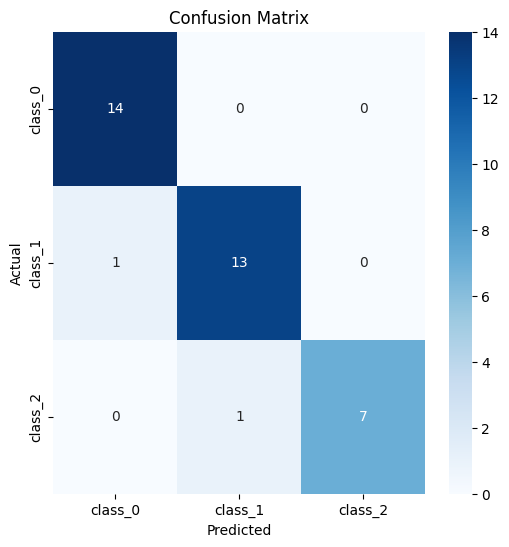

In [11]:
with mlflow.start_run():
    rf = RandomForestClassifier(max_depth=max_depth,n_estimators=n_estimators,random_state=42)
    rf.fit(X_train,y_train)

    y_pred = rf.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)


    mlflow.log_metric("accuracy",accuracy)
    mlflow.log_param("max_depth",max_depth)
    mlflow.log_param("n_estimators",n_estimators)



    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.savefig("Confusion-matrix.png")


    mlflow.log_artifact("Confusion-matrix.png")
    

    mlflow.set_tags({"authoer":'Nikhil',"project":'wine clasification'})

    mlflow.sklearn.log_model(rf,"random forest model")



    print(accuracy)